### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification.
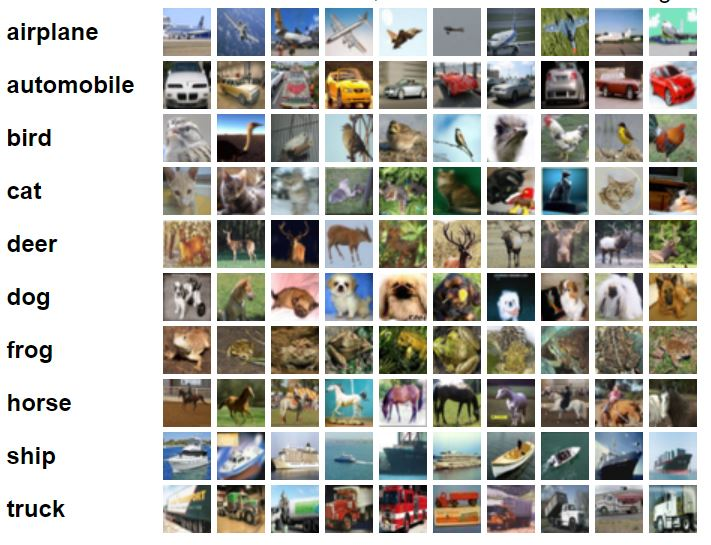

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Laod dataset

In [62]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

### Dataset shape: (num_samples, height, width, channels)
#### For CIFAR-10 test set → (10000, 32, 32, 3):
#### 10000 images, each 32x32 pixels, 3 color channels (RGB).


In [4]:
y_train.shape

(50000, 1)

In [5]:
y_test.shape

(10000, 1)

There are 50000 traning images and 10000 test images

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [67]:
y_train=y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [14]:
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
classes[y_train[790]]

'bird'

#### Image Plot function

In [64]:
def plot_sample(X,y,index):
 plt.figure(figsize = (15,2))
 plt.imshow(X_train[index])
 plt.xlabel(classes[int(y[index])])

/tmp/ipython-input-1196591597.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


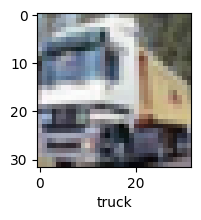

In [65]:
plot_sample(X_train,y_train,1)

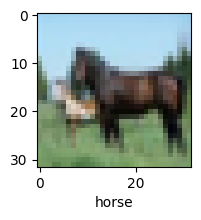

In [78]:
plot_sample(X_train,y_train,12)

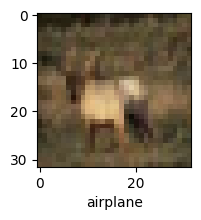

In [77]:
plot_sample(X_test,y_test,3)

In [73]:
print(y_train.shape, y_test.shape)
print(y_train[0], y_test[0])


(50000,) (10000,)
6 3


### Data Preprocessing

Right now, pixel values are integers from 0–255.

Neural nets learn faster if inputs are normalized.

So scale them to 0–1 by dividing by 255.0:

### Normalizing the training data

In [33]:
X_train=X_train/255.0
X_test = X_test / 255.0

In [40]:
X_train[1:1:1]

array([], shape=(0, 32, 32, 3), dtype=float64)

### Check Class Distribution (optional but useful)

Plot histogram of labels to see if classes are balanced.

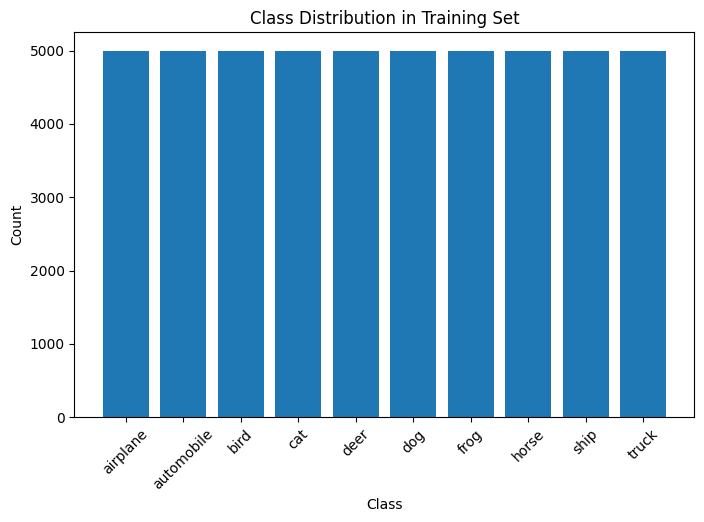

In [42]:
# Plot histogram of training labels
plt.figure(figsize=(8,5))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(range(10), classes, rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Set")
plt.show()

### CIFAR-10 is balanced (every class has 5000 training + 1000 test images)

### Build simple artificial neural network for image classification

In [43]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 80ms/step - accuracy: 0.0974 - loss: 2.3027
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.1008 - loss: 2.3027
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 151s 86ms/step - accuracy: 0.1028 - loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 86ms/step - accuracy: 0.0981 - loss: 2.3027
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 84ms/step - accuracy: 0.1004 - loss: 2.3027


In [44]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_ann = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred_ann]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.07      0.04      0.05      1000
           3       0.10      0.93      0.18      1000
           4       0.03      0.00      0.00      1000
           5       0.25      0.00      0.01      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.16      0.03      0.05      1000
           9       0.17      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.08      0.10      0.03     10000
weighted avg       0.08      0.10      0.03     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ANN on CIFAR-10 stuck at ~10% accuracy → equivalent to random guessing.
### Reason: Dense layers alone cannot capture spatial features in images.
### Need CNN layers (Conv2D + Pooling) to learn local patterns (edges, textures, shapes).


### Build Your CNN Model

Start with a simple architecture:

Convolution + ReLU

MaxPooling

Flatten

Dense (Fully connected) + softmax

In [45]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile Model

Choose optimizer, loss, metrics:

In [46]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [47]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.0994 - loss: 2.3028
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 42ms/step - accuracy: 0.1008 - loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.0989 - loss: 2.3028
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0978 - loss: 2.3028
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.1014 - loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.1013 - loss: 2.3027
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.0983 - loss: 2.3027
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.0996 - loss: 2.3027
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.0995 - loss: 2.3027
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.0966 - loss: 2.3028


In [49]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1043 - loss: 2.3055


[2.3064446449279785, 0.10499999672174454]

Prediction

In [50]:
y_pred_cnn= cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[0.1215132 , 0.11293034, 0.10543527, 0.11239954, 0.07665793,
        0.07357076, 0.09102742, 0.10474286, 0.12173994, 0.07998268],
       [0.13528594, 0.11071098, 0.10467099, 0.11109012, 0.06692912,
        0.0751952 , 0.08501163, 0.09888589, 0.13288765, 0.07933258],
       [0.1321603 , 0.11054292, 0.10454978, 0.1091123 , 0.07141283,
        0.07301237, 0.08744374, 0.10165036, 0.12696113, 0.08315423],
       [0.13189083, 0.11083286, 0.10688663, 0.1067145 , 0.07050724,
        0.07511094, 0.08589293, 0.10168067, 0.12981346, 0.08066983],
       [0.11675506, 0.11640003, 0.10414906, 0.10620125, 0.08049998,
        0.08011683, 0.08959725, 0.10640609, 0.11514125, 0.08473332]],
      dtype=float32)

In [51]:
y_classes = [np.argmax(element) for element in y_pred_cnn]
y_classes[:5]

[np.int64(8), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]

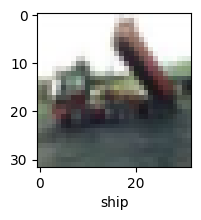

In [76]:
plot_sample(X_test, y_test,2)

In [58]:
classes[y_classes[2]]

'airplane'

In [ ]:
y_test[:5]

In [48]:
print(X_train.shape, y_train.shape)
print(X_train[0].shape, y_train[0])


(50000, 32, 32, 3) (50000,)
(32, 32, 3) 6


In [74]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_classes, y_classes))


NameError: name 'y_test_classes' is not defined